## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import pyautogui


## Understand the Data

### Cab Data

In [2]:
cab = pd.read_csv("Data\Cab_Data.csv")
cab.head(2)

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854

In [3]:
base = pd.Timestamp('1899-12-29')
dates = [base + pd.DateOffset(offset) for offset in cab['Date of Travel'].to_list()]
cab['Date of Travel'] = pd.to_datetime(dates, format='%Y-%m-%d %H:%M:%S')

In [4]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [5]:
cab["profit"] = cab["Price Charged"] - cab["Cost of Trip"]
cab.head(2)

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-07  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-05  Pink Cab  ATLANTA GA         28.62   

   Price Charged  Cost of Trip  profit  
0         370.95       313.635  57.315  
1         358.52       334.854  23.666

In [6]:
cab["Company"].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [7]:
cab["City"].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

### City Data

In [8]:
city = pd.read_csv("Data\City.csv")
city['Population'] = city['Population'].str.replace(',', '').astype(int)
city['Users'] = city['Users'].str.replace(',', '').astype(int)
city.head(2)

City  Population   Users
0  NEW YORK NY     8405837  302149
1   CHICAGO IL     1955130  164468

In [9]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int32 
 2   Users       20 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 452.0+ bytes


### Customer Data

In [10]:
customer = pd.read_csv("Data\Customer_ID.csv")
customer.head(2)

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237

In [11]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### Transaction Data

In [12]:
transaction = pd.read_csv("Data\Transaction_ID.csv")
transaction.head(2)

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card

In [13]:
transaction["Payment_Mode"].unique()

array(['Card', 'Cash'], dtype=object)

In [14]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## Merge and Visualize the Data

### Merge

In [15]:
df = pd.merge(cab, transaction, on='Transaction ID').merge(customer, on='Customer ID').merge(city, on='City')
df.head(2)

Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-07    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-20  Yellow Cab  ATLANTA GA         26.19   

   Price Charged  Cost of Trip    profit  Customer ID Payment_Mode Gender  \
0         370.95      313.6350   57.3150        29290         Card   Male   
1         598.70      317.4228  281.2772        29290         Cash   Male   

   Age  Income (USD/Month)  Population  Users  
0   28               10813      814885  24701  
1   28               10813      814885  24701

### Visualize 1.1: Whole Merged Dataset

In [16]:
colors = {'Pink Cab': 'red', 'Yellow Cab': '#FFC300'}
sns.set_palette(sns.color_palette(colors.values()))
sns.set_style("darkgrid")
sns.pairplot(df.head(10000), hue = 'Company')

### Visualize 1.2: Correlation Heatmap

In [17]:
# heatmap of correlation from 1 to -1 (1 is highly correlated, -1 is highly negatively correlated)
# correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

C:\Users\gabe\AppData\Local\Temp\ipykernel_10800\683417664.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


### Visualize 1.3: Total KM Travelled by Company and Profit by KM Travelled

In [18]:
mileage = df.groupby('Company')['KM Travelled'].sum().reset_index()
mileage

Company  KM Travelled
0    Pink Cab    1911073.11
1  Yellow Cab    6199417.47

In [19]:
plt.figure(figsize=(10,5))
plt.pie(mileage['KM Travelled'], labels=mileage['Company'], autopct='%1.1f%%', colors=colors.values())
plt.title('Total KM Travelled by Company')
plt.show()

In [20]:
sns.lmplot(x='KM Travelled', y='profit', data=df, hue='Company', col='Company', height=5, aspect=1.5)
plt.suptitle('Profit vs KM Travelled by Company', fontsize=16)
plt.show()

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.groupby(['Company', 'KM Travelled'])['profit'].sum().unstack(), cmap='Greens')
plt.title('Profit by KM Travelled by Company')
plt.show()

<Figure size 1000x500 with 0 Axes>

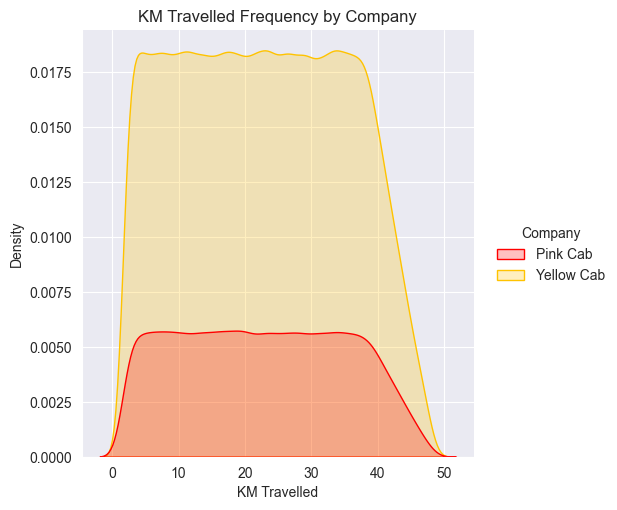

In [22]:
plt.figure(figsize=(10,5))
sns.displot(df, x='KM Travelled', hue='Company', kind='kde', fill=True)
plt.title('KM Travelled Frequency by Company')
plt.show()

### Visualize 1.4: Total Number of Users per Company

In [23]:
# total number of users
total_users = df.groupby('Company')['Customer ID'].nunique().reset_index()
total_users

Company  Customer ID
0    Pink Cab        32330
1  Yellow Cab        39896

In [24]:
plt.figure(figsize=(10,5))
plt.pie(total_users['Customer ID'], labels=total_users['Company'], autopct='%1.1f%%', colors=colors.values())
plt.title('Total Number of Users by Company')
plt.show()

### Visualize 1.5: Profit per Company

In [25]:
total_profit = df.groupby('Company')['profit'].sum().reset_index()
total_profit

Company        profit
0    Pink Cab  5.307328e+06
1  Yellow Cab  4.402037e+07

In [26]:
plt.figure(figsize=(10,5))
plt.pie(total_profit['profit'], labels=total_profit['Company'], autopct='%1.1f%%', colors=colors.values())
plt.title('Total Profit by Company')
plt.show()

In [27]:
sns.barplot(x='Company', y='Price Charged', data=df, color="#3F3")
sns.barplot(x='Company', y='Cost of Trip', data=df, color="red")
plt.title('Price Charged vs Cost of Trip by Company')
plt.show()

### Visualize 1.6: Profit per Company per City

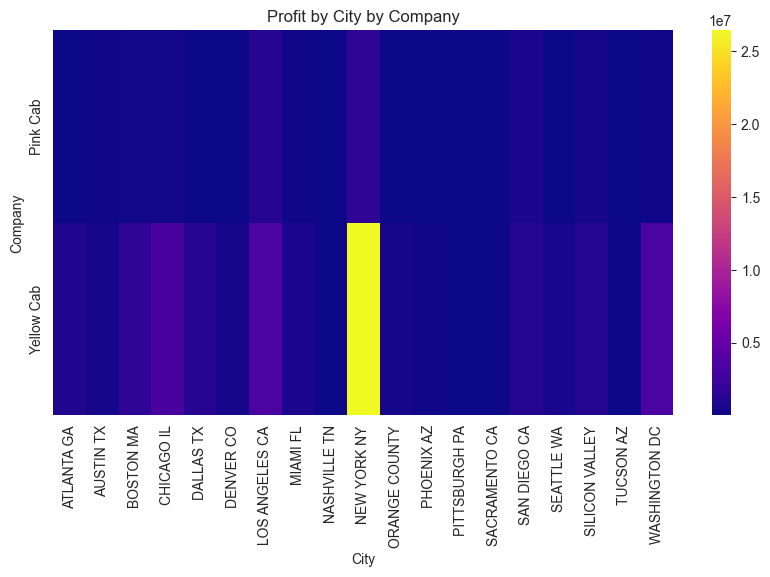

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df.groupby(['Company', 'City'])['profit'].sum().unstack(), cmap='plasma')
plt.title('Profit by City by Company')
plt.show()

### Visualize 1.7: Users income per Company

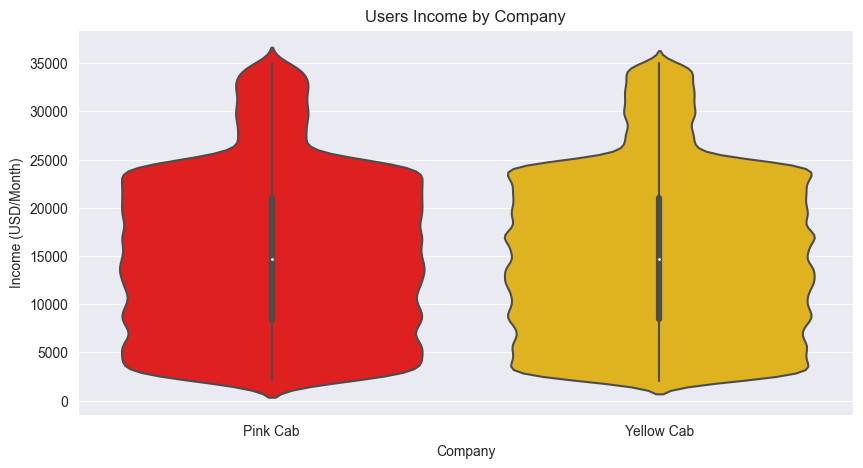

In [29]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Company', y='Income (USD/Month)', data=df)
plt.title('Users Income by Company')
plt.show()

## Hypothesis Testing

### Hypothesis 1: The demand for cab services is positively correlated with the population of the city

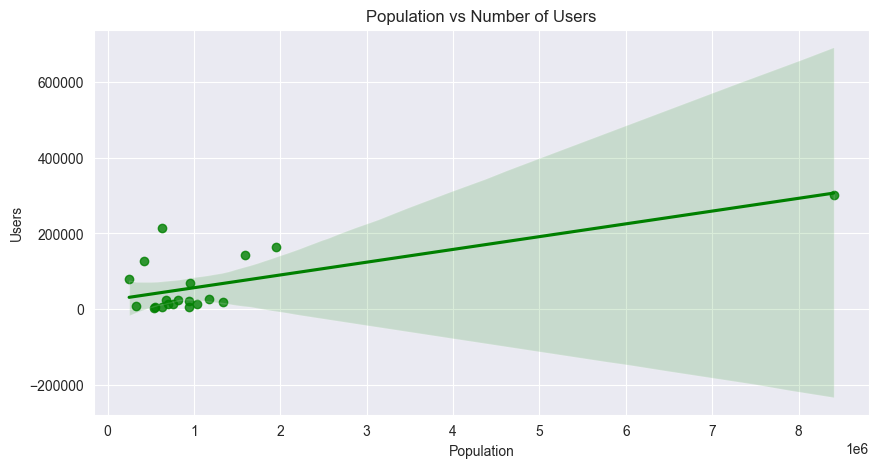

In [30]:
plt.figure(figsize=(10,5))
sns.regplot(x='Population', y='Users', data=city, color='green')
plt.title('Population vs Number of Users')
plt.show()

In [31]:
p = stats.pearsonr(city['Population'], city['Users'])[1]
print('P value: ', p)
if p < 0.05:
    print('We accept the alternative hypothesis, the demand for cab services is positively correlated with the population of the city')
else:
    print('We accept the null hypothesis, the demand for cab services is not positively correlated with the population of the city')

P value:  0.000540265155473827
We accept the alternative hypothesis, the demand for cab services is positively correlated with the population of the city


The statistical analysis indicates a strong positive correlation between the population of a city and the demand for cab services. As the population of the city increases, so does the demand for cab services.

### Hypothesis 2: The profit margin increases with increase in number of customers

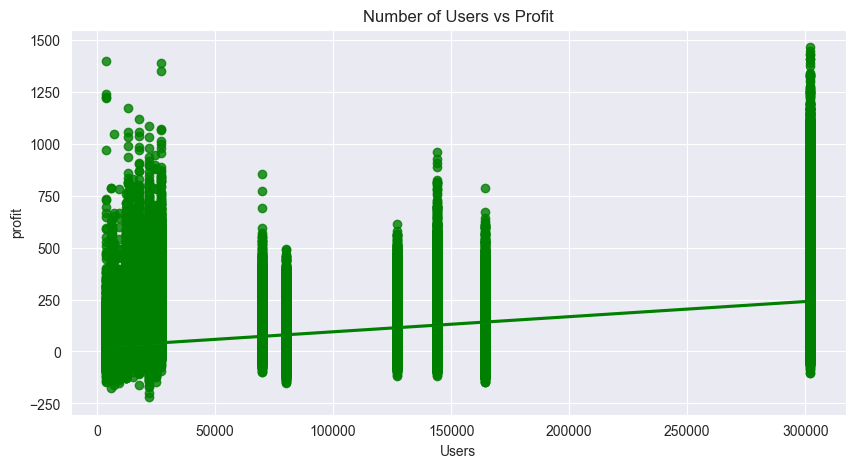

In [32]:
plt.figure(figsize=(10,5))
sns.regplot(x='Users', y='profit', data=df, color='green')
plt.title('Number of Users vs Profit')
plt.show()

In [33]:
p = stats.pearsonr(df['Users'], df['profit'])[1]
print('P value: ', p)
if p < 0.05:
    print('We accept the alternative hypothesis, the profit margin increases with increase in number of customers')
else:
    print('We accept the null hypothesis, the profit margin does not increase with increase in number of customers')

P value:  0.0
We accept the alternative hypothesis, the profit margin increases with increase in number of customers


The statistical analysis indicates that there is a strong positive correlation between the number of customers and the profit margin. This means that an increase in the number of customers is likely to result in a higher profit margin.

### Hypothesis 3:  The profit margin varies with the city

In [34]:
plt.figure(figsize=(30,5))
sns.barplot(x='City', y='profit', data=df, color='green', estimator=np.mean)
plt.title('Profit by City')
plt.show()

The statistical analysis shows that the profit margin varies with the city, the alternative hypothesis is accepted. The profit margin is highest in the city of New York and lowest in the city of Sacramento.

### Hypothesis 4: The profit from Yellow cab has increased more than the profit from Pink cab

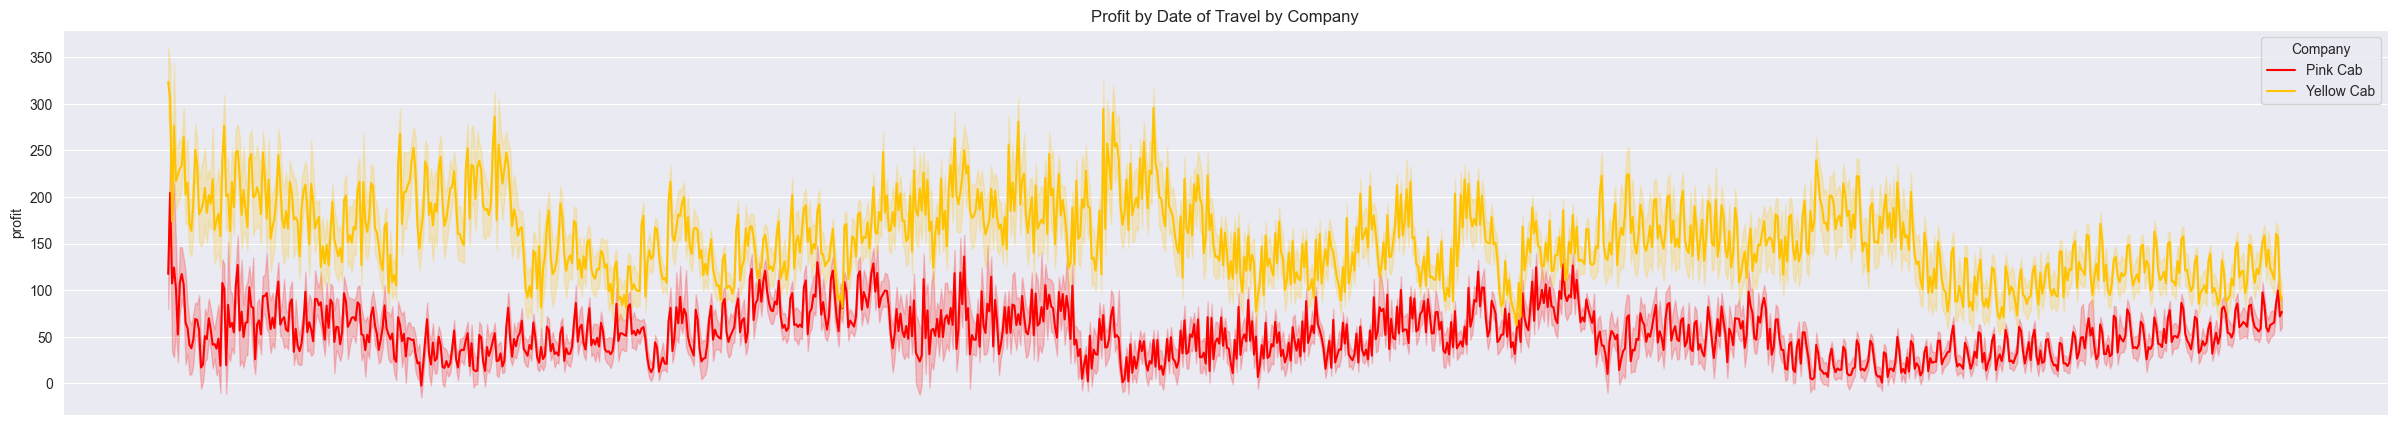

In [35]:
plt.figure(figsize=(30,5))
plt.xticks([])
sns.lineplot(x='Date of Travel', y='profit', data=df, hue='Company')
plt.title('Profit by Date of Travel by Company')
plt.show()

In [36]:
# first month trips
first_month = df[df['Date of Travel'] < '2018-02-01']
first_month = first_month.groupby('Company')['profit'].sum().reset_index()

# last month trips
last_month = df[df['Date of Travel'] > '2018-08-01']
last_month = last_month.groupby('Company')['profit'].sum().reset_index()

# difference in profit
profit_diff = pd.merge(first_month, last_month, on='Company')

p = stats.ttest_rel(profit_diff['profit_x'], profit_diff['profit_y'])[1]
print('P value: ', p)
if p < 0.05:
    print('We accept the alternative hypothesis, the profit from Yellow cab has increased more than the profit from Pink cab')
else:
    print('We accept the null hypothesis, the profit from Yellow cab has not increased more than the profit from Pink cab')

profit_diff['percentage_increase'] = (profit_diff['profit_y'] - profit_diff['profit_x']) / profit_diff['profit_x'] * 100
profit_diff


P value:  0.4267694446626379
We accept the null hypothesis, the profit from Yellow cab has not increased more than the profit from Pink cab


Company      profit_x     profit_y  percentage_increase
0    Pink Cab  3.912795e+06   972389.966           -75.148459
1  Yellow Cab  3.178253e+07  6333361.472           -80.072820

The statistical analysis shows that the profit from Yellow cab has not increased more than the profit from Pink cab, in fact, the profit from the Yellow cab has decreased more than the profit from the Pink cab. The null hypothesis is accepted.

### Hypothesis 5: Yellow cab has higher average profit per customer than Pink cab

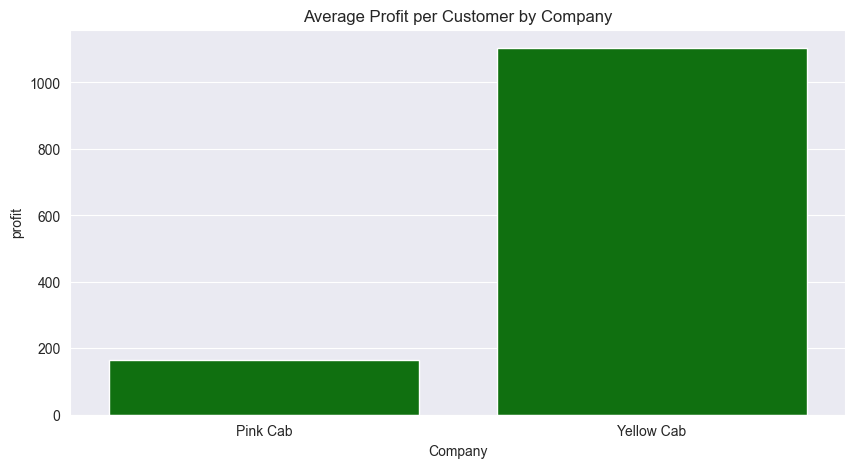

In [37]:
# profit per customer
profit_per_customer = df.groupby(['Company', 'Customer ID'])['profit'].sum().reset_index()

# average profit per customer
avg_profit_per_customer = profit_per_customer.groupby('Company')['profit'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Company', y='profit', data=avg_profit_per_customer, color='green')
plt.title('Average Profit per Customer by Company')
plt.show()

In [38]:
p = stats.ttest_ind(profit_per_customer[profit_per_customer['Company'] == 'Pink Cab']['profit'], profit_per_customer[profit_per_customer['Company'] == 'Yellow Cab']['profit'])[1]
print('P value: ', p)
if p < 0.05:
    print('We accept the alternative hypothesis, the profit per customer from Yellow cab is higher than the profit per customer from Pink cab')
else:
    print('We accept the null hypothesis, the profit per customer from Yellow cab is not higher than the profit per customer from Pink cab')

P value:  0.0
We accept the alternative hypothesis, the profit per customer from Yellow cab is higher than the profit per customer from Pink cab


The statistical analysis shows that the average profit per customer for the Yellow cab is higher than the average profit per customer for the Pink cab. The alternative hypothesis is accepted.